<a href="https://colab.research.google.com/github/Jorgecuenca1/Vision-computadora-I/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP3**
Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
*Material_TPs/TP3/images* a partir del template *Material_TPs/TP3/template*
1. **(4 puntos)** Obtener una detección del logo en cada imagen sin falsos positivos
2. **(4 puntos)** Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1
3. **(2 puntos)** Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

1. Obtener una detección del logo en cada imagen sin falsos positivos.

In [2]:
#importa librerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

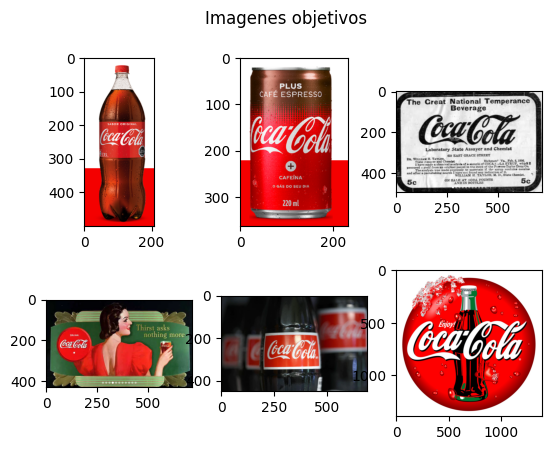

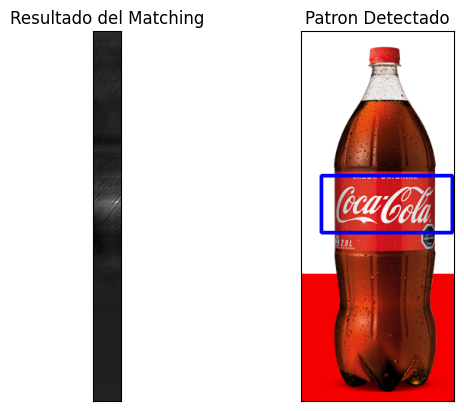

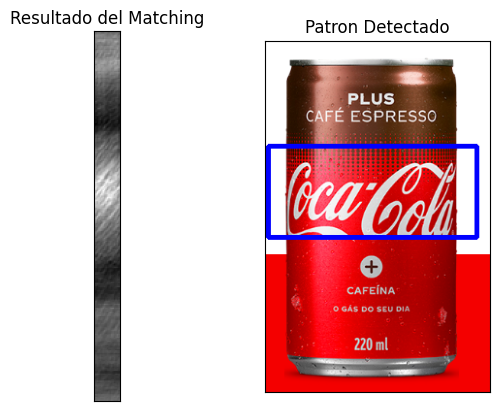

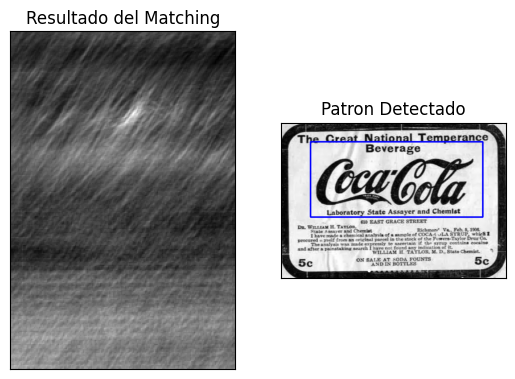

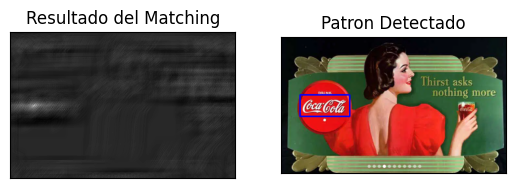

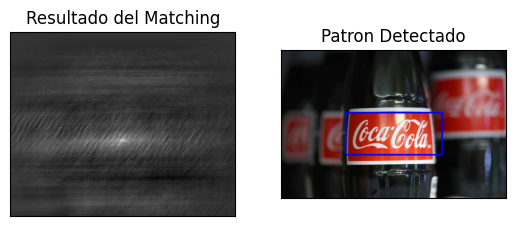

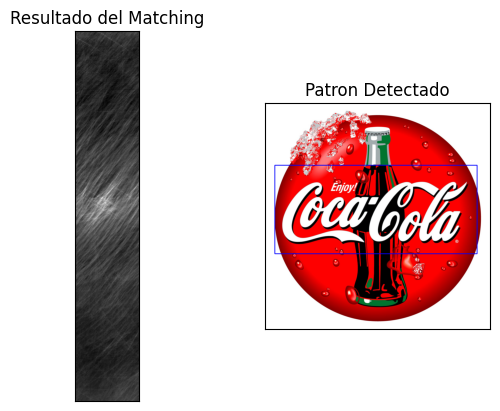

In [77]:
# Cargamos las imagenes
folder_dir = "./content"
img_names = ["coca_logo_1.png", "coca_logo_2.png", "coca_retro_1.png", "coca_retro_2.png", "logo_1.png", "COCA-COLA-LOGO.jpg"]

img_obj = []
for img_name in img_names:
    img_path = os.path.join(folder_dir, img_name)
    img = cv.imread(img_path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_obj.append(img_rgb)

# Graficamos imagenes
plt.figure()
plt.suptitle("Imagenes objetivos")
for i in range(len(img_obj)):
    plt.subplot(2, 3, (i+1))
    plt.imshow(img_obj[i])
plt.show()

# Transformacion a escala de grises
img_gray_proces = []
for i  in range(len(img_obj)):
    gray = cv.cvtColor(img_obj[i], cv.COLOR_RGB2GRAY)
    gray_gauss = cv.GaussianBlur(gray, (5,5), 0)
    gray_canny = cv.Canny(gray_gauss, 150, 250)
    img_gray_proces.append(gray_canny)

# Cargamos patron
patron = cv.imread(folder_dir+"/pattern.png")
patron_gray = cv.cvtColor(patron, cv.COLOR_BGR2GRAY)

for i  in range(len(img_obj)):
    img_salida = img_obj[i].copy()
    mejor_val_max = None
    mejor_loc = None
    mejor_res = None

    for scale in np.linspace(0.2, 5.0, 100)[::-1]:
        # Reduccion y ampliacion del patron para recorrer posibles posibilidades en
        # tamaño en el que puede hacerse presente en las imagenes objetivos
        patron_resized = cv.resize(patron_gray, (int(patron_gray.shape[1]*scale), int(patron_gray.shape[0]*scale)))
        # La imagen objetivo debe ser mayor en tamaño o igual a la del patron.
        if( (img_gray_proces[i].shape[0] > patron_resized.shape[0]) and (img_gray_proces[i].shape[1] > patron_resized.shape[1]) ):
            # Procesamos el patron
            patron_gauss = cv.GaussianBlur(patron_resized, (5,5), 0)
            patron_canny = cv.Canny(patron_gauss, 50, 200)
            # Coincidencia
            res = cv.matchTemplate(img_gray_proces[i], patron_canny, cv.TM_CCOEFF)
            # Valores máximos y mínimos
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
            # Si el valor maximo encontrado anteriormente es mayor al que teniamos guardado reemplazamos los valores por los de la corrida actual
            if ( mejor_val_max is None or (max_val > mejor_val_max) ):
                mejor_val_max = max_val
                mejor_loc = max_loc
                mejor_res = res
                h, w = patron_resized.shape[::]

    # Recuadro donde hubo coincidencia
    top_left = mejor_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, (0, 0, 255), 4)

    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Resultado del Matching')
    plt.imshow(mejor_res, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,2,2)
    plt.imshow(img_salida)
    plt.title('Patron Detectado')
    plt.xticks([])
    plt.yticks([])
    plt.show()


#### Se revisaron las imagenes objetivos con el patron bajo los metodos de Gaussianblur y adaptiveThreshold induciendo una mejora antes de la aplicacion del algoritmo de feature matching. Se grafican los resultados y se puede observar que en todos los casos (de deteccion simple) se halló el patron definido.

## 2

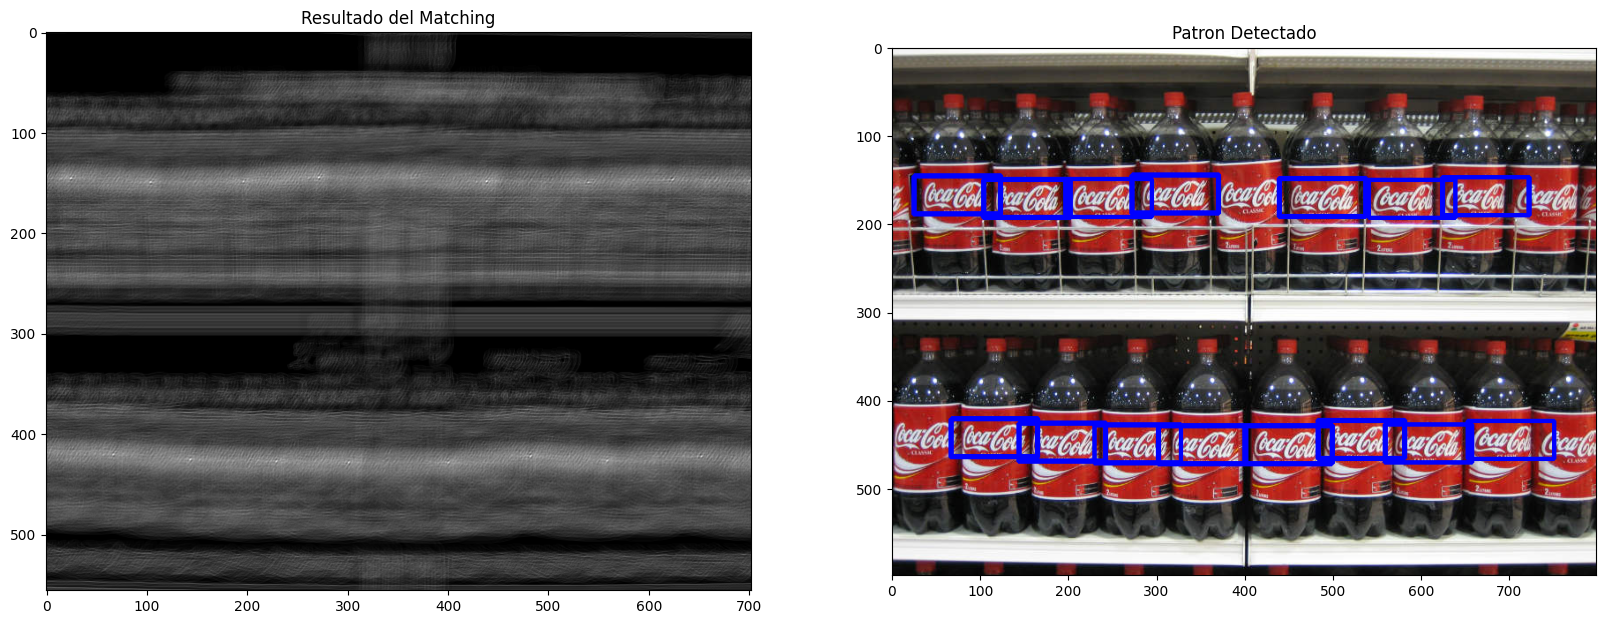

In [78]:

# Cargamos la imagen
os.chdir("./content")
folder_dir = os.getcwd()
os.chdir("..")
img_multiple = cv.imread(folder_dir+"/coca_multi.png")
img_mult_rgb = cv.cvtColor(img_multiple, cv.COLOR_BGR2RGB)
img_mult_gray = cv.cvtColor(img_mult_rgb, cv.COLOR_RGB2GRAY)
# Proceso la imagen
img_gray_gauss = cv.GaussianBlur(img_mult_gray, (5,5), 0)
img_gray_canny = cv.Canny(img_gray_gauss, 150, 250)

# Cargamos el patron en escala de grises
patron = cv.imread(folder_dir+"/pattern.png")
patron_gray = cv.cvtColor(patron, cv.COLOR_BGR2GRAY)
mejor_val_max = None
mejor_res = None

for scale in np.linspace(0.2, 2.0, 40)[::-1]:
    # Reducimos y ampliamos la imagen patron para recorrer los posibles tamaños que el patron pueda tener en la imagen objetivo
    patron_resized = cv.resize(patron_gray, (int(patron_gray.shape[1]*scale), int(patron_gray.shape[0]*scale)))
    # Verificamos que las dimensiones de la imagen objetivo sean mayor que la del patron 
    if( (img_mult_gray.shape[0] > patron_resized.shape[0]) and (img_mult_gray.shape[1] > patron_resized.shape[1]) ):
        # Procesamos el patron redimencionado
        patron_gauss = cv.GaussianBlur(patron_resized, (5,5), 0)
        patron_canny = cv.Canny(patron_gauss, 50, 200)
        # Coincidencias
        res = cv.matchTemplate(img_gray_canny, patron_canny, cv.TM_CCORR_NORMED)
        # Valores maximos y minimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        # Si el valor maximo encontrado anteriormente es mayor al que teniamos guardado reemplazamos los valores por los de la corrida actual
        if ( mejor_val_max is None or (max_val > mejor_val_max) ):
            mejor_val_max = max_val
            mejor_res = res
            h, w = patron_resized.shape[::]

threshold = mejor_val_max*0.75
loc = np.where( mejor_res >= threshold )
for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle.
    #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
    cv.rectangle(img_mult_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 4)  #Red rectangles with thickness 2.

# Graficamos
plt.subplots(1, 2, figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(mejor_res,cmap = 'gray')
plt.title('Resultado del Matching')
plt.subplot(1,2,2)
plt.imshow(img_mult_rgb)
plt.title('Patron Detectado')
plt.show()

## Conclusión

#### De esta manera podemos encontrar coincidencias para mas de un resultado posible, se toma como valor maximo la de mejor corrida, modificandole la escala y luego se le aplica un porcentaje para que considere todas las posibilidaddes de match para el patron.